  # AI on the edge

Deep learning on small devices


- Motivation
- Deep nets for devices
- Running deep nets on devices

## Why run AI on devices?

![cloud](assets/lsvm-machine-learning-cloud.jpg)

![data center](assets/how_safe_datacenter.jpg)

<img src='assets/GDP-Complience-V02-72dpi-RGB-01.jpg' width='70%'/>

<img src='assets/qualcomm_on_device_intelligence.png' width='80%'/>

## What can run on devices?

## AlexNet

60 million parameters, 720 million multiply-adds

<img src="assets/alexnet.png"/>

https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf

## SqueezeNet

https://arxiv.org/abs/1602.07360

https://github.com/DeepScale/SqueezeNet
<img src='assets/squeezenet_unit.png' width='800'/>

<img src='assets/squeezenet_arch.png' width='65%'/>
<img src='assets/squeezenet_bypass.png' width='70%'/>

<img src='assets/squeezenet_compare.png'/>

## MobileNet

https://arxiv.org/abs/1704.04861v1

Standard convolution:

$$h_i.w_i.d_i.d_j.k^2$$

Depthwise separable

$$h_i.w_i.d_i(d_j+k^2)$$

<img src='assets/depthwise_separable_conv_unit.png' width='450' style='float:left;'/>
<img src='assets/depthwise_separable_conv_layer.png' width='450' style='float:left;'/>

<img src='assets/mobilenets.png' width='500'/>

<img src='assets/mobilenet_res.png' width='900'/>
<img src='assets/mobilenet_acc.png' width='40%'/>

## ShuffleNet

https://arxiv.org/abs/1707.01083

https://github.com/MG2033/ShuffleNet

<img src='assets/shufflenet_channelshuffle.png'/>

<img src='assets/shufflenet_unit.png'/>

<img src='assets/shufflenet_compare_class.png'/>

## MobileNet V2

https://arxiv.org/abs/1801.04381

Convolution: 

$$h_i.w_i.d_i.d_j.k^2$$

Depthwise separable convolution (MobileNet):

$$h_i.w_i.d_i(d_j+k^2)$$

Bottleneck residual convolution (MobileNet V2):

$$h_i.w_i.d_i.t(d_i+d_j+k^2)$$


<img src='assets/mobilenetv2_unit.png' width='60%'/>

<img src='assets/mobilenetv2_residual.png' width='70%'/>
<img src='assets/mobilenetv2_residual_curve.png' width='70%'/>

<img src='assets/mobilenetv2_block_compare.png' width='60%'/>

<img src='assets/mobilenetv2_block.png' width='500' style='float:left;'/>
<img src='assets/mobilenetv2_arch.png' width='500' style='float:left;'/>

<img src='assets/mobilenetv2_curve.png'/>

<img src='assets/mobilenetv2_compare.png' width='65%'/>

## How to run on devices?

## CoreML

https://developer.apple.com/documentation/coreml

- download pre-trained .mlmodel
  - or convert from Caffe, Tensorflow, Onyx, etc
- add to XCode project to generate wrapper
  - use optional Vision library to preprocess images
- models

## Demo: Image Classification
---
https://github.com/hollance/MobileNet-CoreML

|MobileNet|SqueezeNet|
|--|--|
|<img src='assets/coreml_mobilenet.png' width='400'/>|<img src='assets/coreml_sqeezenet.png' width='400'/>|

## TensorFlow

- TensorFlow: https://github.com/samjabrahams/tensorflow-on-raspberry-pi
- TensorFlow Lite: https://medium.com/@haraldfernengel/compiling-tensorflow-lite-for-a-raspberry-pi-786b1b98e646
<img src='assets/tflite-architecture.jpg' width='500'/>

## Demo: Image Classification (again)
---
https://github.com/tensorflow/models/tree/master/research/slim/nets/mobilenet

In [14]:
from __future__ import print_function

import tensorflow as tf
print("TensorFlow: ", tf.__version__)

import platform
print(", ".join(platform.uname()))

TensorFlow:  1.8.0
Linux, f7eb4f133388, 4.14.34-v7+, #1110 SMP Mon Apr 16 15:18:51 BST 2018, armv7l, 


In [5]:
from IPython import display

# download tensorflow models
!git clone https://github.com/tensorflow/models

Cloning into 'models'...
remote: Counting objects: 16153, done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 16153 (delta 2), reused 2 (delta 2), pack-reused 16149
Receiving objects: 100% (16153/16153), 424.03 MiB | 3.95 MiB/s, done.
Resolving deltas: 100% (9560/9560), done.
Checking out files: 100% (2163/2163), done.


In [6]:
# download a recent MobileNet V2 checkpoint
checkpoint_name = 'mobilenet_v2_1.0_224'
url = 'https://storage.googleapis.com/mobilenet_v2/checkpoints/' + checkpoint_name + '.tgz'
print('Downloading from ', url)

!curl -L {url} -o {checkpoint_name}.tgz
print('Unpacking')

!tar -xvf {checkpoint_name}.tgz
checkpoint = checkpoint_name + '.ckpt'

display.clear_output()
print('Successfully downloaded', url, 'as', checkpoint)

Successfully downloaded https://storage.googleapis.com/mobilenet_v2/checkpoints/mobilenet_v2_1.0_224.tgz as mobilenet_v2_1.0_224.ckpt


In [7]:
# download test image
!curl -L -o test.jpg 'https://upload.wikimedia.org/wikipedia/commons/b/bf/Angela_Merkel._Tallinn_Digital_Summit.jpg'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  388k  100  388k    0     0   117k      0  0:00:03  0:00:03 --:--:--  117k


In [9]:
# Setup image processing
import sys
sys.path += ['models/research/slim']

import tensorflow as tf
from nets.mobilenet import mobilenet_v2

tf.reset_default_graph()

file_input = tf.placeholder(tf.string, ())
image = tf.image.decode_jpeg(tf.read_file(file_input))
images = tf.expand_dims(image, 0)
images = tf.cast(images, tf.float32) / 128.  - 1
images.set_shape((None, None, None, 3))
images = tf.image.resize_images(images, (224, 224))

In [10]:
# Setup checkpoint
with tf.contrib.slim.arg_scope(mobilenet_v2.training_scope(is_training=False)):
  logits, endpoints = mobilenet_v2.mobilenet(images)
  
# Restore using exponential moving average since it produces (1.5-2%)
# higher accuracy
ema = tf.train.ExponentialMovingAverage(0.999)
vars = ema.variables_to_restore()

saver = tf.train.Saver(vars)

In [18]:
# Restore from checkpoint
import numpy as np
from IPython import display
from datasets import imagenet
import PIL
display.display(display.Image('test.jpg', width=128))

with tf.Session() as sess:
    saver.restore(sess,  checkpoint)
    y = endpoints['Predictions'].eval(feed_dict={file_input: 'test.jpg'})

label_map = imagenet.create_readable_names_for_imagenet_labels()
print('Top 1 prediction: ', y.argmax(), label_map[y.argmax()], y.max())

    100% |████████████████████████████████| 14.3MB 488kB/s ta 0:00:01
  Running setup.py bdist_wheel for pillow ... error
  Complete output from command /usr/bin/python -u -c "import setuptools, tokenize;__file__='/tmp/pip-install-BtvoKd/pillow/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/pip-wheel-6U_w2w --python-tag cp27:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-armv7l-2.7
  creating build/lib.linux-armv7l-2.7/PIL
  copying src/PIL/ImageMorph.py -> build/lib.linux-armv7l-2.7/PIL
  copying src/PIL/IcnsImagePlugin.py -> build/lib.linux-armv7l-2.7/PIL
  copying src/PIL/IptcImagePlugin.py -> build/lib.linux-armv7l-2.7/PIL
  copying src/PIL/ImageFile.py -> build/lib.linux-armv7l-2.7/PIL
  copying src/PIL/ImageTransform.py -> build/lib.linux-armv7l-2.7/PIL
  copying src/PIL/_binary.py -> build/lib.linux-armv7l-2.7/PIL


Failed to build pillow
  Running setup.py install for pillow ... error
    Complete output from command /usr/bin/python -u -c "import setuptools, tokenize;__file__='/tmp/pip-install-BtvoKd/pillow/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record /tmp/pip-record-NULuE0/install-record.txt --single-version-externally-managed --compile:
    running install
    running build
    running build_py
    creating build
    creating build/lib.linux-armv7l-2.7
    creating build/lib.linux-armv7l-2.7/PIL
    copying src/PIL/ImageMorph.py -> build/lib.linux-armv7l-2.7/PIL
    copying src/PIL/IcnsImagePlugin.py -> build/lib.linux-armv7l-2.7/PIL
    copying src/PIL/IptcImagePlugin.py -> build/lib.linux-armv7l-2.7/PIL
    copying src/PIL/ImageFile.py -> build/lib.linux-armv7l-2.7/PIL
    copying src/PIL/ImageTransform.py -> build/lib.linux-armv7l-2.7/PIL
    copying src/PIL/_binary.py -> build/lib.

Command "/usr/bin/python -u -c "import setuptools, tokenize;__file__='/tmp/pip-install-BtvoKd/pillow/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record /tmp/pip-record-NULuE0/install-record.txt --single-version-externally-managed --compile" failed with error code 1 in /tmp/pip-install-BtvoKd/pillow/


ImportError: No module named PIL

## Movidius

<img src='assets/ncs_workflow.jpg'/>

Python and C API: https://github.com/movidius/ncsdk

Caffe and TensorFlow models: https://github.com/movidius/ncappzoo/ 

<img src='assets/NCS1_ArchDiagram.jpg'/>

https://www.pyimagesearch.com/2018/02/19/real-time-object-detection-on-the-raspberry-pi-with-the-movidius-ncs/

<img src='assets/pi_ncs_objectdetection_table.jpg'/>

## Demo: Object Detection
---

## Embedded Learning Library (ELL)

https://microsoft.github.io/ELL/


## ImageNet 2012 Classification on Raspberry Pi 3

<img src='assets/ell_pareto.png'/>

## Optimized Deep Neural Net

<img src='assets/ell_tiny.png'/>

https://microsoft.github.io/ELL/gallery/ILSVRC2012/BrazilianGuava.html

## Audio Keyword Classification on Cortex M4
---

<video controls src='assets/ell_demo.mp4'/>

## Demo: Keyword Classification

---

https://microsoft.github.io/ELL/tutorials/Getting-started-with-audio-keyword-classification-on-the-Raspberry-Pi/

## Field Programmable Gate Arrays

<img src='assets/Hot-Chips-Stratix-10-board-1-.jpg'/>

<img src='assets/silicon_alternatives.png'/>

https://www.microsoft.com/en-us/research/blog/microsoft-unveils-project-brainwave/

## Neural Net Accelerators
- https://arxiv.org/abs/1712.08934
- https://github.com/Xilinx/RFNoC-HLS-NeuralNet
- https://github.com/doonny/PipeCNN

<img src='assets/Demo-DE5-net.gif'/>

## Project Brainwave
---
https://github.com/Azure/aml-real-time-ai/blob/master/notebooks/resnet50/00_QuickStart.ipynb

## Summary

Models
- Image Classification / Object Detection: MobileNetV2, SqueezeNet
- Keyword Classification: GRU + Classifier

Running Models
- CoreML
- TensorFlow / TensorFlow Lite
- Movidius Neural Compute Stick
- Embedded Learning Library
- FPGAs

In [12]:
# https://tomroelandts.com/articles/how-to-compute-colorful-fractals-using-numpy-and-matplotlib
import numpy as np

m = 480
n = 320
 
s = 300  # Scale.
x = np.linspace(-m / s, m / s, num=m).reshape((1, m))
y = np.linspace(-n / s, n / s, num=n).reshape((n, 1))
Z = np.tile(x, (n, 1)) + 1j * np.tile(y, (1, m))
 
C = np.full((n, m), -0.4 + 0.6j)
M = np.full((n, m), True, dtype=bool)
N = np.zeros((n, m))
for i in range(256):
    Z[M] = Z[M] * Z[M] + C[M]
    M[np.abs(Z) > 2] = False
    N[M] = i

Thank you!


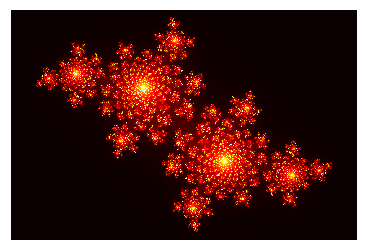

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(m / 100, n / 100)
ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(np.flipud(N), cmap='hot')

print('Thank you!')